In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import cross_validate, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import tree
from fi_utils import load_dataset
from plt_utils import plot_confusion_matrix
from datetime import datetime
from tpot import TPOTClassifier
#import autosklearn.classification
from hpsklearn import HyperoptEstimator
%matplotlib inline  

### Visualização dos 5 primeiros exemplos do conjunto




In [68]:
fifa_filepath = "data.csv"
data = pd.read_csv(fifa_filepath)

print(data["Position"].unique())
print(len(data["Position"].unique()))


['RF' 'ST' 'LW' 'GK' 'RCM' 'LF' 'RS' 'RCB' 'LCM' 'CB' 'LDM' 'CAM' 'CDM'
 'LS' 'LCB' 'RM' 'LAM' 'LM' 'LB' 'RDM' 'RW' 'CM' 'RB' 'RAM' 'CF' 'RWB'
 'LWB' nan]
28


In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
Unnamed: 0                  18207 non-null int64
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null fl

In [70]:
df = load_dataset()
df.head()

,Age,Overall,Preferred Foot,Skill Moves,Position,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,...,GKHandling,GKKicking,GKPositioning,GKReflexes,Value_float,Wage_float,Release_Clause_float,Weight_int,Height_int,Pos
0,31,94,0,4.0,RF,84.0,95.0,70.0,90.0,86.0,...,11.0,15.0,14.0,8.0,110500000.0,565000.0,226500000.0,159,170.0,Strikers
1,33,94,1,5.0,ST,84.0,94.0,89.0,81.0,87.0,...,11.0,15.0,14.0,11.0,77000000.0,405000.0,127100000.0,183,188.0,Strikers
2,26,92,1,5.0,LW,79.0,87.0,62.0,84.0,84.0,...,9.0,15.0,15.0,11.0,118500000.0,290000.0,228100000.0,150,175.0,Strikers
3,27,91,1,1.0,GK,17.0,13.0,21.0,50.0,13.0,...,85.0,87.0,88.0,94.0,72000000.0,260000.0,138600000.0,168,193.0,Defender
4,27,91,1,4.0,RCM,93.0,82.0,55.0,92.0,82.0,...,13.0,5.0,10.0,13.0,102000000.0,355000.0,196400000.0,154,180.0,Midfielder


In [71]:
df.describe()

,Age,Overall,Preferred Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,...,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Value_float,Wage_float,Release_Clause_float,Weight_int,Height_int
count,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,...,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,1.664300e+04,16643.000000,1.664300e+04,16643.000000,16643.000000
mean,25.226221,66.162771,0.770474,2.349516,49.596167,45.257766,52.120711,58.543952,42.678363,55.104729,...,16.747521,16.515712,16.355765,16.503936,16.837409,2.442667e+06,9618.037613,4.585061e+06,165.987202,181.169320
std,4.716588,7.008236,0.420541,0.755855,18.453544,19.538677,17.471305,14.810741,17.740778,19.008604,...,17.832273,17.033907,16.615668,17.151713,18.090985,5.720629e+06,22263.518927,1.111872e+07,15.575312,6.674893
min,16.000000,46.000000,0.000000,1.000000,5.000000,2.000000,4.000000,7.000000,4.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+04,1000.000000,1.300000e+04,110.000000,155.000000
25%,21.000000,62.000000,1.000000,2.000000,38.000000,30.000000,44.000000,53.000000,30.000000,48.000000,...,8.000000,8.000000,8.000000,8.000000,8.000000,3.000000e+05,1000.000000,5.250000e+05,154.000000,175.000000
50%,25.000000,66.000000,1.000000,2.000000,54.000000,48.000000,55.000000,62.000000,43.000000,61.000000,...,11.000000,11.000000,11.000000,11.000000,11.000000,6.750000e+05,3000.000000,1.100000e+06,165.000000,180.000000
75%,29.000000,71.000000,1.000000,3.000000,64.000000,61.000000,64.000000,68.000000,56.000000,68.000000,...,14.000000,14.000000,14.000000,14.000000,14.000000,2.000000e+06,8000.000000,3.500000e+06,176.000000,185.000000
max,45.000000,94.000000,1.000000,5.000000,93.000000,95.000000,94.000000,93.000000,90.000000,97.000000,...,90.000000,92.000000,91.000000,90.000000,94.000000,1.185000e+08,565000.000000,2.281000e+08,243.000000,206.000000


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16643 entries, 0 to 18206
Data columns (total 45 columns):
Age                     16643 non-null int64
Overall                 16643 non-null int64
Preferred Foot          16643 non-null int64
Skill Moves             16643 non-null float64
Position                16643 non-null object
Crossing                16643 non-null float64
Finishing               16643 non-null float64
HeadingAccuracy         16643 non-null float64
ShortPassing            16643 non-null float64
Volleys                 16643 non-null float64
Dribbling               16643 non-null float64
Curve                   16643 non-null float64
FKAccuracy              16643 non-null float64
LongPassing             16643 non-null float64
BallControl             16643 non-null float64
Acceleration            16643 non-null float64
SprintSpeed             16643 non-null float64
Agility                 16643 non-null float64
Reactions               16643 non-null float64
Balan


---

# Data visualization


---

Distribuição geral dos dados para as classes de posições.


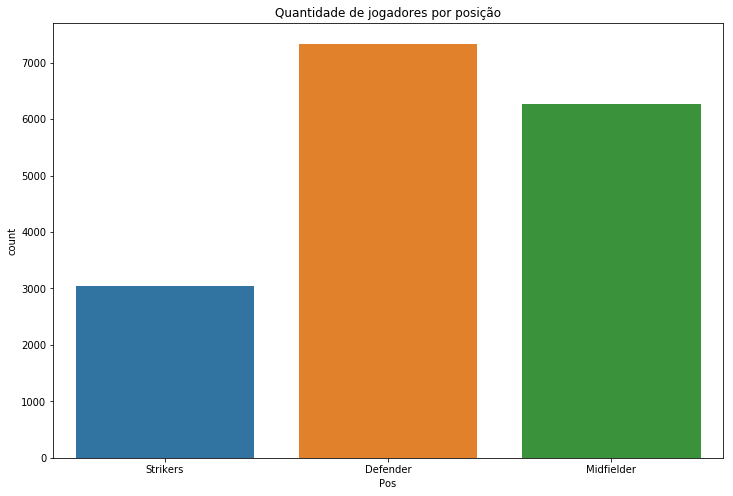

In [50]:
plt.figure(figsize=(12, 8))
plt.title("Quantidade de jogadores por posição")
plt.xlabel("Área de atuaçãos")
plt.ylabel("Quantidade de jogadores")
fig = sns.countplot(x = 'Pos', data =df)

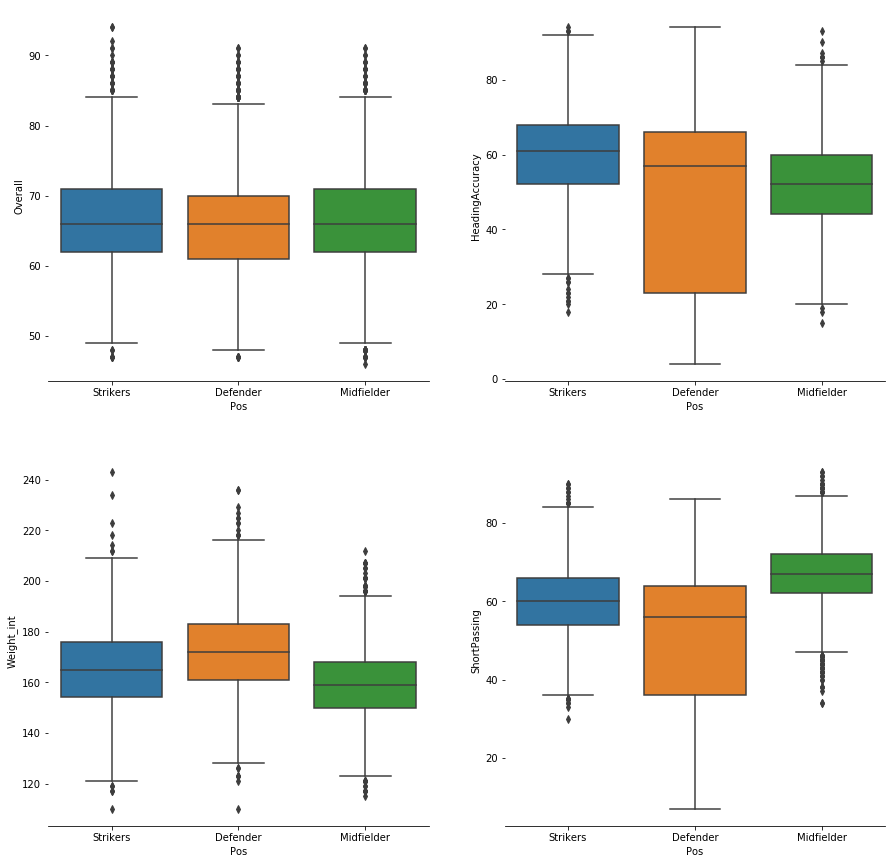

In [51]:
# Set up the matplotlib figure
f, axes = plt.subplots(2, 2, figsize=(15, 15), sharex=False)
sns.despine(left=True)
sns.boxplot('Pos', 'Overall', data = df, ax=axes[0, 0])
sns.boxplot('Pos', 'HeadingAccuracy', data = df, ax=axes[0, 1])
sns.boxplot('Pos', 'ShortPassing', data = df, ax=axes[1, 1])
sns.boxplot('Pos', 'Weight_int', data = df, ax=axes[1, 0])


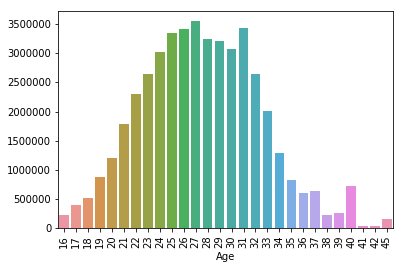

In [52]:
mean_value_per_age = df.groupby('Age')['Value_float'].mean()
p = sns.barplot(x = mean_value_per_age.index, y = mean_value_per_age.values)
p = plt.xticks(rotation=90)

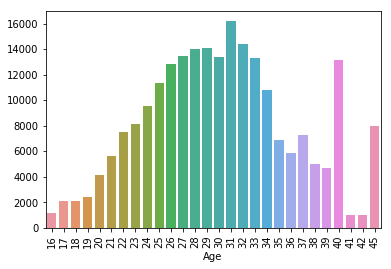

In [40]:
mean_wage_per_age = df.groupby('Age')['Wage_float'].mean()
p = sns.barplot(x = mean_wage_per_age.index, y = mean_wage_per_age.values)
p = plt.xticks(rotation=90)

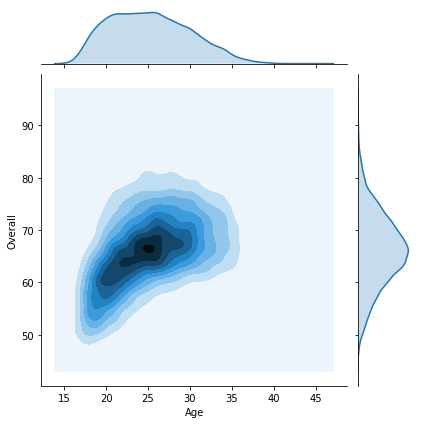

In [24]:

sns.jointplot(x='Age', y="Overall", data=df, kind="kde")


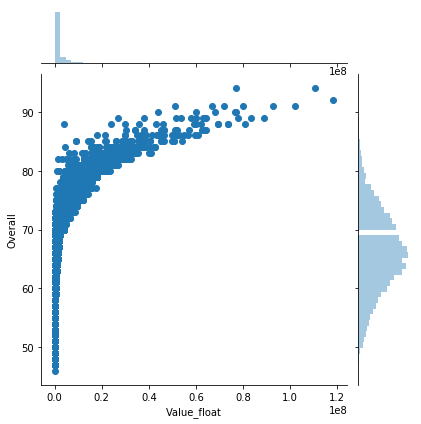

In [25]:
sns.jointplot(x='Value_float', y="Overall", data=df)

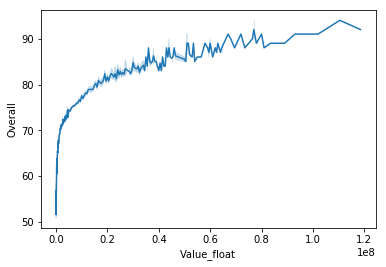

In [26]:
sns.lineplot(x='Value_float', y="Overall", data=df)

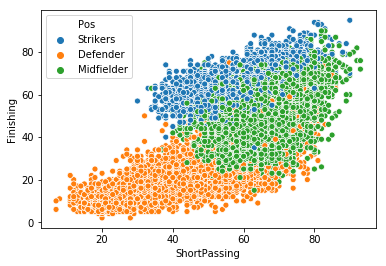

In [14]:
ax = sns.scatterplot(x="ShortPassing", y="Finishing", hue="Pos",data=df)

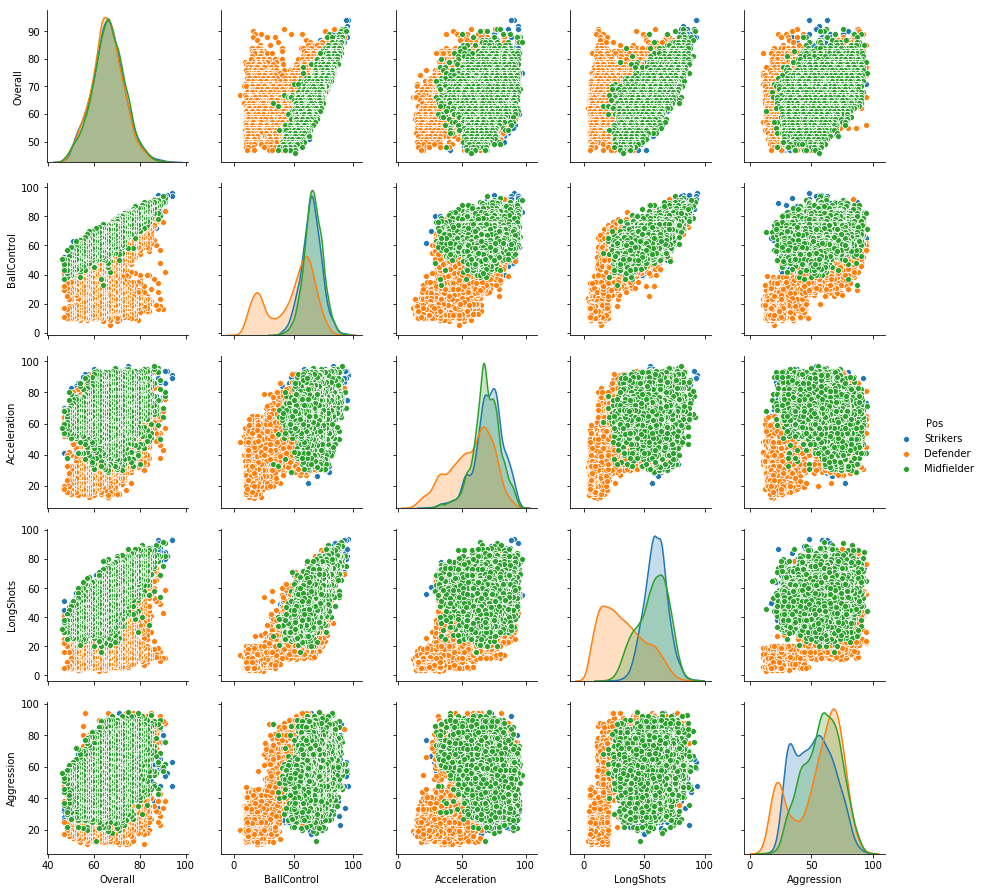

In [15]:
df_new = df[['Overall',
'BallControl',
'Acceleration',
'LongShots',
'Aggression',
'Pos']]

sns.pairplot(df_new, kind="scatter", hue="Pos") 
plt.show()


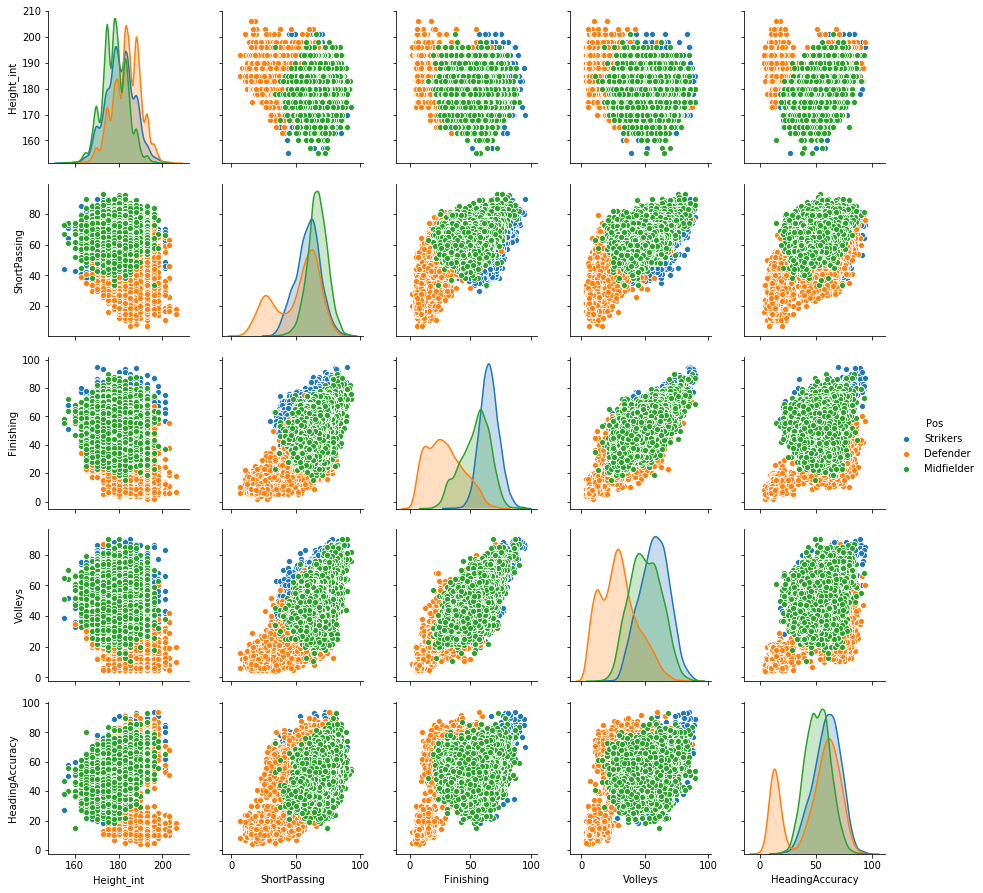

In [16]:
df_new = df[['Height_int',
'ShortPassing',
'Finishing',
'Volleys',
'HeadingAccuracy',
'Pos']]

sns.pairplot(df_new, kind="scatter", hue="Pos") 
plt.show()

### Separação do conjunto de dados em Treinamento/dev e test

In [72]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split


target_names = df["Pos"].unique()
le_class = preprocessing.LabelEncoder()
df['Pos'] = le_class.fit_transform(df['Pos'])

y = df["Pos"]

df.drop(columns=["Position","Pos"],inplace=True)


X_train_dev, X_test, y_train_dev, y_test = train_test_split(df, y, 
                                                    test_size=0.20, 
                                                    random_state=42 )
print(X_train_dev.shape)
print(X_test.shape)

print(X_train_dev.info())



(13314, 43)
(3329, 43)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 13314 entries, 12320 to 17334
Data columns (total 43 columns):
Age                     13314 non-null int64
Overall                 13314 non-null int64
Preferred Foot          13314 non-null int64
Skill Moves             13314 non-null float64
Crossing                13314 non-null float64
Finishing               13314 non-null float64
HeadingAccuracy         13314 non-null float64
ShortPassing            13314 non-null float64
Volleys                 13314 non-null float64
Dribbling               13314 non-null float64
Curve                   13314 non-null float64
FKAccuracy              13314 non-null float64
LongPassing             13314 non-null float64
BallControl             13314 non-null float64
Acceleration            13314 non-null float64
SprintSpeed             13314 non-null float64
Agility                 13314 non-null float64
Reactions               13314 non-null float64
Balance                 

### O conjunto de treinamento/dev é separado utilizando um croos-validation 10-fold (em todos os treinamentos)

In [28]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

### Treinamento com pipeline


In [18]:

pipeline = Pipeline([
    ('normalizer', StandardScaler()), #Step1 - normalize data
    ('clf', LogisticRegression()) #step2 - classifier
])

clfs = []
clfs.append(LogisticRegression(random_state=0))
clfs.append(SVC(random_state=0,kernel="linear",C=1))
clfs.append(KNeighborsClassifier(n_neighbors=3))
clfs.append(DecisionTreeClassifier(random_state=0,max_depth=3))
clfs.append(RandomForestClassifier(random_state=0,max_depth=3))
clfs.append(GradientBoostingClassifier(random_state=0,max_depth=3))

In [50]:
all_scores = []

for classifier in clfs:
    pipeline.set_params(clf = classifier)
    scores = cross_validate(pipeline, X_train_dev, y_train_dev,cv=10)
    print('---------------------------------')
    print(str(classifier))
    print('-----------------------------------')
    
    print('----------------------------------')
    df = pd.DataFrame()
    df['score'] = scores['test_score']
    df.insert(0, 'score_name', 'test_score')
    tempDf = pd.DataFrame()
    tempDf['score'] = scores['train_score']
    tempDf.insert(0, 'score_name', 'train_score')
    
    df = pd.concat([df,tempDf])
    
    all_scores.append(df.reset_index())
    
    print('----------------------------------')
    
    
    for key, values in scores.items():
            print(key,' mean ', values.mean())
            print(key,' std ', values.std())

TypeError: cross_validate() got an unexpected keyword argument 'random_state'

Text(0.5, 1.0, 'GradientBoostingClassifier')

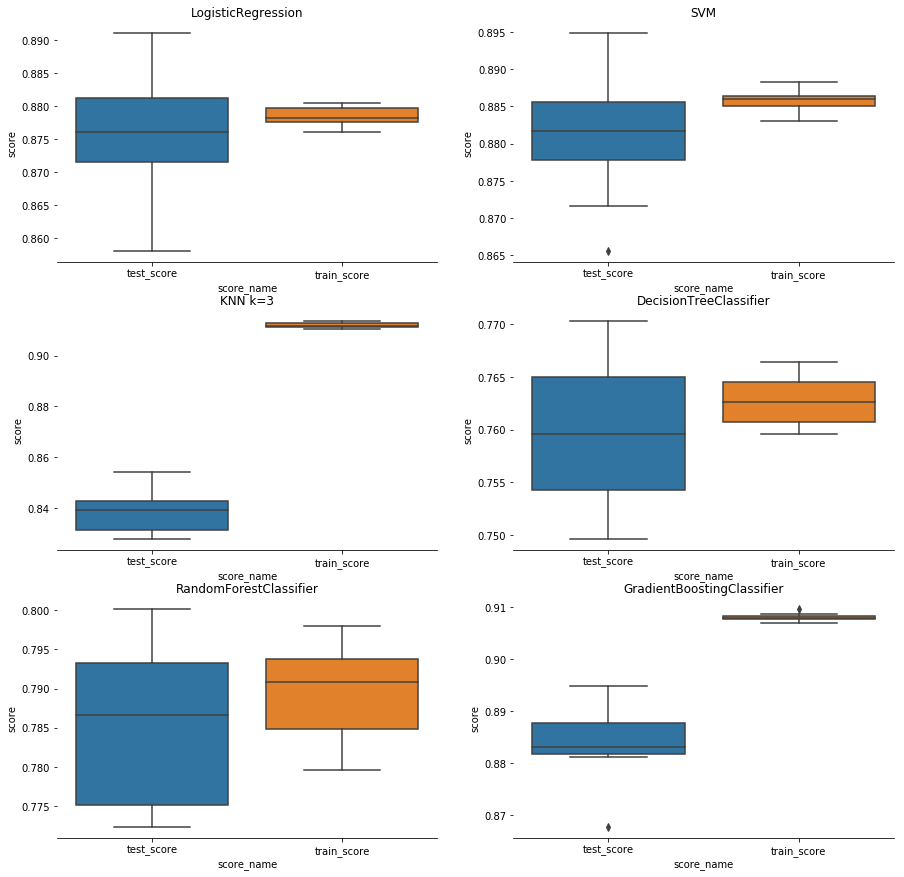

In [37]:
# Set up the matplotlib figure
f, axes = plt.subplots(3, 2, figsize=(15, 15), sharex=False)
sns.despine(left=True)
sns.boxplot(y='score',x='score_name', data=all_scores[0],ax=axes[0, 0]).set_title("LogisticRegression")
sns.boxplot(y='score',x='score_name', data=all_scores[1],ax=axes[0, 1]).set_title("SVM")
sns.boxplot(y='score',x='score_name', data=all_scores[2],ax=axes[1, 0]).set_title("KNN k=3")
sns.boxplot(y='score',x='score_name', data=all_scores[3],ax=axes[1, 1]).set_title("DecisionTreeClassifier")
sns.boxplot(y='score',x='score_name', data=all_scores[4],ax=axes[-1,0]).set_title("RandomForestClassifier")
sns.boxplot(y='score',x='score_name', data=all_scores[5],ax=axes[-1,-1]).set_title("GradientBoostingClassifier")



In [12]:
learning_rates = [1, 0.5, 0.25, 0.1, 0.05, 0.01]
train_results = []
test_results = []
for eta in learning_rates:
    scores = cross_validate(GradientBoostingClassifier(learning_rate=eta), X_train_dev, y_train_dev,cv=10,scoring="accuracy")
    train_results.append(scores['train_score'].mean())
    test_results.append(scores['test_score'].mean())
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(learning_rates, train_results, 'b', label="Train ACC")
line2, = plt.plot(learning_rates, test_results, 'r', label="Test ACC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('ACC score')
plt.xlabel('learning rate')
plt.show()

/home/bruno/anaconda3/envs/fifa-ml/lib/python3.7/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/bruno/anaconda3/envs/fifa-ml/lib/python3.7/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


KeyboardInterrupt: 

In [43]:
parameters = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "min_samples_split": np.linspace(0.1, 0.5, 12),
    "min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "max_depth":[3,5,6,7,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":[10]
    }

clf = RandomizedSearchCV(GradientBoostingClassifier(), parameters, cv=10, n_jobs=-1)

clf.fit(X_train_dev, y_train_dev)
print(clf.score(X_train_dev, y_train_dev))
print(clf.score(X_test, y_test))
print(clf.best_params_)

0.8233438485804416
0.8296785821568038
{'subsample': 0.85, 'n_estimators': 10, 'min_samples_split': 0.28181818181818186, 'min_samples_leaf': 0.13636363636363638, 'max_features': 'sqrt', 'max_depth': 6, 'loss': 'deviance', 'learning_rate': 0.2, 'criterion': 'friedman_mse'}


/home/bruno/anaconda3/envs/automl-3.6/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/bruno/anaconda3/envs/automl-3.6/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/bruno/anaconda3/envs/automl-3.6/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/b

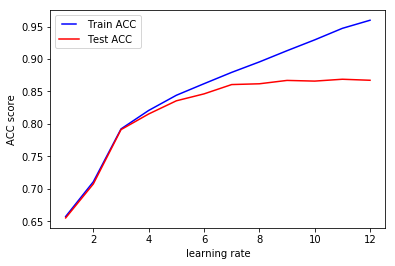

In [22]:
max_depths = [1, 2, 3, 4, 5, 6,7,8,9,10,11,12]
train_results = []
test_results = []
for depth in max_depths:
    scores = cross_validate(RandomForestClassifier(max_depth=depth), X_train_dev, y_train_dev,cv=10,scoring="accuracy")
    train_results.append(scores['train_score'].mean())
    test_results.append(scores['test_score'].mean())
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(learning_rates, train_results, 'b', label="Train ACC")
line2, = plt.plot(learning_rates, test_results, 'r', label="Test ACC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('ACC score')
plt.xlabel('max_depth')
plt.show()

In [32]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [33]:
rf = RandomForestClassifier(max_depth = 7)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 10, verbose=2, random_state=0, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train_dev, y_train_dev)
rf_random.best_params_

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] n_estimators=1400, min_samples_split=2, min_samples_leaf=1, max_features=auto, bootstrap=True 
[CV] n_estimators=1400, min_samples_split=2, min_samples_leaf=1, max_features=auto, bootstrap=True 
[CV] n_estimators=1400, min_samples_split=2, min_samples_leaf=1, max_features=auto, bootstrap=True 
[CV] n_estimators=1400, min_samples_split=2, min_samples_leaf=1, max_features=auto, bootstrap=True 
[CV]  n_estimators=1400, min_samples_split=2, min_samples_leaf=1, max_features=auto, bootstrap=True, total=  28.4s
[CV] n_estimators=1400, min_samples_split=2, min_samples_leaf=1, max_features=auto, bootstrap=True 
[CV]  n_estimators=1400, min_samples_split=2, min_samples_leaf=1, max_features=auto, bootstrap=True, total=  28.4s
[CV] n_estimators=1400, min_samples_split=2, min_samples_leaf=1, max_features=auto, bootstrap=True 
[CV]  n_estimators=1400, min_samples_split=2, min_samples_leaf=1, max_features=auto, bootstrap=True, total=

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  4.9min


[CV]  n_estimators=1400, min_samples_split=2, min_samples_leaf=2, max_features=auto, bootstrap=False, total=  41.1s
[CV] n_estimators=1400, min_samples_split=2, min_samples_leaf=2, max_features=auto, bootstrap=False 
[CV]  n_estimators=1400, min_samples_split=2, min_samples_leaf=2, max_features=auto, bootstrap=False, total=  41.6s
[CV] n_estimators=1400, min_samples_split=2, min_samples_leaf=2, max_features=auto, bootstrap=False 
[CV]  n_estimators=1400, min_samples_split=2, min_samples_leaf=2, max_features=auto, bootstrap=False, total=  41.1s
[CV] n_estimators=1400, min_samples_split=2, min_samples_leaf=2, max_features=auto, bootstrap=False 
[CV]  n_estimators=1400, min_samples_split=2, min_samples_leaf=2, max_features=auto, bootstrap=False, total=  42.5s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, bootstrap=True 
[CV]  n_estimators=1400, min_samples_split=2, min_samples_leaf=2, max_features=auto, bootstrap=False, total=  42.8s
[CV] n_estimators=

[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=auto, bootstrap=True 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=auto, bootstrap=True, total=   4.6s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=auto, bootstrap=True 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=2, max_features=auto, bootstrap=False, total=  18.1s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=auto, bootstrap=True 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=auto, bootstrap=True, total=   4.3s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=auto, bootstrap=True 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=auto, bootstrap=True, total=   4.4s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=auto, bootstrap=True 
[CV]  n_estimators=200, min_samples_split=2, mi

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 10.4min finished


{'n_estimators': 1400,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'bootstrap': True}

In [21]:
rf = RandomForestClassifier(max_depth = 7,n_estimators= 1400,
 min_samples_split=10,
 min_samples_leaf=1,
 max_features='sqrt',
 bootstrap= True)



In [22]:
scores = cross_validate(rf, X_train_dev, y_train_dev,cv=10)
print('---------------------------------')
print(str(classifier))
print('-----------------------------------')
    
print('----------------------------------')
df = pd.DataFrame()
df['score'] = scores['test_score']
df.insert(0, 'score_name', 'test_score')
tempDf = pd.DataFrame()
tempDf['score'] = scores['train_score']
tempDf.insert(0, 'score_name', 'train_score')
    
df = pd.concat([df,tempDf])

print('----------------------------------')

KeyboardInterrupt: 

Text(0.5, 1.0, 'RandomForestOptimized')

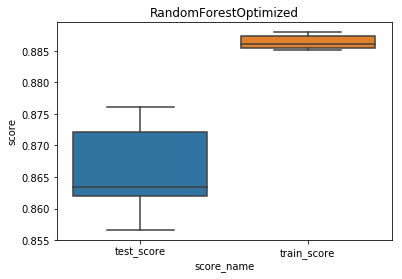

In [36]:
scores
sns.boxplot(y='score',x='score_name', data=df).set_title("RandomForestOptimized")


## Otimização de algoritmos de classificação com random search

In [76]:
def hpolregressio(X_train_dev,y_train_dev,X_test,y_test):
    logistic = LogisticRegression(random_state=0)
    # Create regularization penalty space
    penalty = ['l1', 'l2']

    # Create regularization hyperparameter distribution using uniform distribution
    C = np.linspace(0.00002,1,100)

    # Create hyperparameter options
    hyperparameters = dict(C=C, penalty=penalty)
    
    clf = RandomizedSearchCV(logistic, hyperparameters, random_state=1, cv=10, verbose=0, n_jobs=-1)
    best_model = clf.fit(X_train_dev, y_train_dev)
    y_hat = best_model.predict(X_test)
    y_hat_train = best_model.predict(X_train_dev)
    print("Accuracy score lr test", accuracy_score(y_test, y_hat))
    print("Accuracy score lr train", accuracy_score(y_train_dev, y_hat_train))
    print(clf.best_params_)
    
def hposvc(X_train_dev,y_train_dev,X_test,y_test):
    svm = SVC(kernel="linear")
    grid_list = {"C": np.arange(2, 10, 2),
             "gamma": np.arange(0.1, 1, 0.2)}
    
    clf = RandomizedSearchCV(svm, grid_list, random_state=1, cv=10,n_iter = 5, verbose=0, n_jobs=-1)
    best_model = clf.fit(StandardScaler().fit_transform(X_train_dev.values), y_train_dev)
    y_hat = best_model.predict(StandardScaler().fit_transform(X_test.values))
    y_hat_train = best_model.predict(StandardScaler().fit_transform(X_train_dev.values))
    print("Accuracy score svm test", accuracy_score(y_test, y_hat))
    print("Accuracy score svm train", accuracy_score(y_train_dev, y_hat_train))
    print(clf.best_params_)
    
def hpoknn(X_train_dev,y_train_dev,X_test,y_test):
    knn = KNeighborsClassifier()
    grid_list = {"n_neighbors": list(range(1, 31))}
    
    clf = RandomizedSearchCV(knn, grid_list, random_state=1,  cv=10, verbose=0, n_jobs=-1)
    best_model = clf.fit(StandardScaler().fit_transform(X_train_dev.values), y_train_dev)
    y_hat = best_model.predict(StandardScaler().fit_transform(X_test.values))
    y_hat_train = best_model.predict(StandardScaler().fit_transform(X_train_dev.values))
    print("Accuracy score knn test", accuracy_score(y_test, y_hat))
    print("Accuracy score knn train", accuracy_score(y_train_dev, y_hat_train))
    print(clf.best_params_)
    
def hpodecision(X_train_dev,y_train_dev,X_test,y_test):
    dt = DecisionTreeClassifier()
    param_grid = {"criterion": ["gini", "entropy"],
              "min_samples_split": [2, 10, 20],
              "max_depth": [None, 2, 5, 10],
              "min_samples_leaf": [1, 5, 10],
              "max_leaf_nodes": [None, 5, 10, 20],
              }
    
    clf = RandomizedSearchCV(dt, param_grid, random_state=1, cv=10, verbose=0, n_jobs=-1)
    best_model = clf.fit(X_train_dev, y_train_dev)
    y_hat = best_model.predict(X_test)
    y_hat_train = best_model.predict(X_train_dev)
    print("Accuracy score dt test", accuracy_score(y_test, y_hat))
    print("Accuracy score dt train", accuracy_score(y_train_dev, y_hat_train))
    print(clf.best_params_)
    
    
    


    

In [77]:
import threading
import time

t1 = threading.Thread(target=hpolregressio,args=[X_train_dev,y_train_dev,X_test,y_test])
t2 = threading.Thread(target=hposvc,args=[X_train_dev,y_train_dev,X_test,y_test])
t3 = threading.Thread(target=hpoknn,args=[X_train_dev,y_train_dev,X_test,y_test])
t4 = threading.Thread(target=hpodecision,args=[X_train_dev,y_train_dev,X_test,y_test])
#t1.start()
t2.start()
#t3.start()
#t4.start()
#t1.join()
t2.join()
#t3.join()
#t4.join()


Generation 2 - Current Pareto front scores:
-1	0.8845583547867737	GradientBoostingClassifier(input_matrix, GradientBoostingClassifier__learning_rate=0.1, GradientBoostingClassifier__max_depth=6, GradientBoostingClassifier__max_features=0.1, GradientBoostingClassifier__min_samples_leaf=1, GradientBoostingClassifier__min_samples_split=13, GradientBoostingClassifier__n_estimators=100, GradientBoostingClassifier__subsample=0.6000000000000001)

Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
Skipped pipeline #33 due to time out. Continuing to the next pipeline.
Generation 3 - Current Pareto front scores:
-1	0.885536360074814	GradientBoostingClassifier(input_matrix, GradientBoostingClassifier__learning_rate=0.1, GradientBoostingClassifier__max_depth=6, GradientBoostingClassifier__max_features=0.6000000000000001, GradientBoostingClassifier__min_samples_leaf=1, GradientBoostingClassifier__min_samples_split=1

# Autosklearn

In [38]:
automl = autosklearn.classification.AutoSklearnClassifier(
        time_left_for_this_task=120,
        per_run_time_limit=300,
        tmp_folder='/tmp/autosklearn_cv_example_tmp',
        output_folder='/tmp/autosklearn_cv_example_out',
        delete_tmp_folder_after_terminate=False,
        resampling_strategy='cv',
        resampling_strategy_arguments={'folds': 10},
)

# fit() changes the data in place, but refit needs the original data. We
# therefore copy the data. In practice, one should reload the data
automl.fit(X_train_dev.copy(), y_train_dev.copy(), dataset_name='fifa_dataset')
# During fit(), models are fit on individual cross-validation folds. To use
# all available data, we call refit() which trains all models in the
automl.sprint_statistics()


[WARNING] [2019-07-05 15:45:12,824:EnsembleBuilder(1):fifa_dataset] No models better than random - using Dummy Score!
[WARNING] [2019-07-05 15:45:12,836:EnsembleBuilder(1):fifa_dataset] No models better than random - using Dummy Score!
Time limit for a single run is higher than total time limit. Capping the limit for a single run to the total time given to SMAC (119.497530)
[WARNING] [2019-07-05 15:45:14,843:EnsembleBuilder(1):fifa_dataset] No models better than random - using Dummy Score!
[WARNING] [2019-07-05 15:45:16,846:EnsembleBuilder(1):fifa_dataset] No models better than random - using Dummy Score!
[WARNING] [2019-07-05 15:45:18,850:EnsembleBuilder(1):fifa_dataset] No models better than random - using Dummy Score!
[WARNING] [2019-07-05 15:45:20,854:EnsembleBuilder(1):fifa_dataset] No models better than random - using Dummy Score!
[WARNING] [2019-07-05 15:45:22,859:EnsembleBuilder(1):fifa_dataset] No models better than random - using Dummy Score!
[WARNING] [2019-07-05 15:45:24,86

'auto-sklearn results:\n  Dataset name: fifa_dataset\n  Metric: accuracy\n  Best validation score: 0.880652\n  Number of target algorithm runs: 2\n  Number of successful target algorithm runs: 1\n  Number of crashed target algorithm runs: 0\n  Number of target algorithms that exceeded the time limit: 1\n  Number of target algorithms that exceeded the memory limit: 0\n'

In [39]:
automl.show_models()


"[(1.000000, SimpleClassificationPipeline({'balancing:strategy': 'none', 'categorical_encoding:__choice__': 'one_hot_encoding', 'classifier:__choice__': 'random_forest', 'imputation:strategy': 'mean', 'preprocessor:__choice__': 'no_preprocessing', 'rescaling:__choice__': 'standardize', 'categorical_encoding:one_hot_encoding:use_minimum_fraction': 'True', 'classifier:random_forest:bootstrap': 'True', 'classifier:random_forest:criterion': 'gini', 'classifier:random_forest:max_depth': 'None', 'classifier:random_forest:max_features': 0.5, 'classifier:random_forest:max_leaf_nodes': 'None', 'classifier:random_forest:min_impurity_decrease': 0.0, 'classifier:random_forest:min_samples_leaf': 1, 'classifier:random_forest:min_samples_split': 2, 'classifier:random_forest:min_weight_fraction_leaf': 0.0, 'classifier:random_forest:n_estimators': 100, 'categorical_encoding:one_hot_encoding:minimum_fraction': 0.01},\ndataset_properties={\n  'task': 2,\n  'sparse': False,\n  'multilabel': False,\n  'mul

In [40]:
pd.DataFrame(automl.cv_results_)

,mean_test_score,mean_fit_time,params,rank_test_scores,status,param_balancing:strategy,param_categorical_encoding:__choice__,param_classifier:__choice__,param_imputation:strategy,param_preprocessor:__choice__,...,param_classifier:xgradient_boosting:normalize_type,param_classifier:xgradient_boosting:rate_drop,param_classifier:xgradient_boosting:sample_type,param_preprocessor:fast_ica:n_components,param_preprocessor:kernel_pca:coef0,param_preprocessor:kernel_pca:degree,param_preprocessor:kernel_pca:gamma,param_preprocessor:nystroem_sampler:coef0,param_preprocessor:nystroem_sampler:degree,param_preprocessor:nystroem_sampler:gamma
0,0.880652,31.579002,"{'balancing:strategy': 'none', 'categorical_en...",1,Success,none,one_hot_encoding,random_forest,mean,no_preprocessing,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.000000,76.082076,"{'balancing:strategy': 'weighting', 'categoric...",2,Timeout,weighting,one_hot_encoding,gradient_boosting,median,polynomial,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
automl.refit(X_train_dev,y_train_dev)
y_hat = automl.predict(X_test)
y_hat_train = automl.predict(X_train_dev)
print("Accuracy score test", accuracy_score(y_test, y_hat))
print("Accuracy score train", accuracy_score(y_train_dev, y_hat_train))

Accuracy score test 0.892760588765395
Accuracy score train 1.0


## TPOT

In [ ]:
tpot = TPOTClassifier(generations=3,population_size=10,verbosity=3,cv=10,
                                    random_state=42)
tpot.fit(X_train_dev,y_train_dev)
y_pred_train = tpot.predict(X_train_dev)
y_pred = tpot.predict(X_test)
print("Accuracy score test", accuracy_score(y_test, y_hat))
print("Accuracy score train", accuracy_score(y_train_dev, y_hat_train))
    

30 operators have been imported by TPOT.


_pre_test decorator: _random_mutation_operator: num_test=0 Found array with 0 feature(s) (shape=(50, 0)) while a minimum of 1 is required..
_pre_test decorator: _random_mutation_operator: num_test=1 Found array with 0 feature(s) (shape=(50, 0)) while a minimum of 1 is required..
_pre_test decorator: _random_mutation_operator: num_test=0 '(slice(None, None, None), 0)' is an invalid key.
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
